# Data Challenge 7 — Evaluating SLR, Assumptions, & the Bias–Variance Tradeoff

**Goal:** Fit a simple linear regression (SLR) with a **train–test split**, report **MAE/RMSE** on *unseen* data, and use **training residuals** to check assumptions. Explain **bias vs. variance** in plain English.


> Dataset: **NYC Yellow Taxi — Dec 2023** (CSV). Keep code *simple* — minimal coercion for chosen columns only.

## We Do — Instructor Session (20 mins)
Use this **step-by-step plan** to guide students. Keep it high-level; they will implement in the *You Do* section.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- MAE / MSE / RMSE — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- OLS (fit/predict/residuals) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
- OLS Results (attributes like `resid`, `fittedvalues`, `summary`) — statsmodels: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html
- Q–Q plot — SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

### Pseudocode Plan
1) **Load CSV** → preview columns/shape.
2) **Assign Y and X (one predictor)** → pick numeric columns that matter; if needed, coerce **just** these to numeric and drop NAs.
3) **Add intercept** → `X = add_constant(X)`.
4) **Train–test split (80/20)** → `X_train, X_test, y_train, y_test = train_test_split(...)` (set `random_state`).
5) **Fit on TRAIN** → `model = OLS(y_train, X_train).fit()`.
6) **Predict on TEST** → `y_pred = model.predict(X_test)`.
7) **Evaluate on TEST** → compute **MAE** and **RMSE** using `y_test` & `y_pred`; speak in **units of Y**.
8) **Diagnostics on TRAIN** → use `model.resid` & `model.fittedvalues` for residuals vs fitted; Q–Q plot; check Durbin–Watson in `model.summary()`.
9) **Bias–variance read (optional)** → compare train vs test errors.
10) **Stakeholder one-liner** → MAE/RMSE in units + brief reliability note.


## You Do — Student Section
Work in pairs. Keep code simple and comment your choices.

### Step 0 — Setup & Imports

In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats 

### Step 1 & 2 — Read in the file and Choose **Y** (target) and **X** (one predictor)
- Keep them numeric and present in your CSV.

**Hint: You may have to drop missing values and do a force coercion to make sure the variables stay numeric (other coding assignments may help)**

In [50]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_23551/2497641473.py:1: DtypeWarning: Columns (4,10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Marcy_Student/Desktop/Marcy_Lab/DA2025_Lectures/Mod6/data/2023_Yellow_Taxi_Trip_Data_20251015.csv')


In [51]:
display(df.head())
display(df.info())
display(df.describe())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,12/01/2023 04:11:39 PM,12/01/2023 04:19:13 PM,2.0,0.69,1.0,N,141,140,1,7.9,2.5,0.5,3.0,0.0,1.0,17.4,2.5,0.0
1,1,12/01/2023 04:11:39 PM,12/01/2023 04:20:41 PM,3.0,1.1,1.0,N,236,263,2,10.0,5.0,0.5,0.0,0.0,1.0,16.5,2.5,0.0
2,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0,1.57,1.0,N,48,239,4,-10.7,-2.5,-0.5,0.0,0.0,-1.0,-17.2,-2.5,0.0
3,2,12/01/2023 04:11:39 PM,12/01/2023 04:20:38 PM,1.0,1.57,1.0,N,48,239,4,10.7,2.5,0.5,0.0,0.0,1.0,17.2,2.5,0.0
4,1,12/01/2023 04:11:39 PM,12/01/2023 04:34:39 PM,2.0,3,1.0,N,164,211,1,21.9,5.0,0.5,3.0,0.0,1.0,31.4,2.5,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310907 entries, 0 to 3310906
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          object 
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            object 
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             object 
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           object 
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(8), int64(4), object(7)
memory usage: 479.9+ MB


None

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee
count,3.310907e+06,3.133527e+06,3.133527e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.310907e+06,3.133527e+06,3.133527e+06
mean,1.750368e+00,1.409560e+00,1.784972e+00,1.650685e+02,1.639182e+02,1.168633e+00,1.485240e+00,4.828656e-01,5.734011e-01,9.758456e-01,2.270032e+00,1.367974e-01
std,4.356449e-01,9.117169e-01,8.283274e+00,6.428330e+01,6.968454e+01,5.959677e-01,1.814139e+00,1.206643e-01,2.228458e+00,2.170912e-01,8.078364e-01,4.796868e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.917000e+01,-5.000000e-01,-7.000000e+01,-1.000000e+00,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,5.168000e+01,4.217000e+01,1.613800e+02,1.000000e+00,2.500000e+00,1.750000e+00


The response variable (Y) I chose is `fare_amount`, representing the fare charged for a taxi trip. I think this outcome is meaningful for my stakeholders `taxi company`, who aim to understand which trip factors most influence earnings. My stakeholders can act on this information to optimize pricing, scheduling, and customer service strategies. 
And the x-variable I chose is `trip_distance` because longer trips lead to higher fares, this is the single strongest predictor of total amount.


In [52]:
# Coerce fare, tip, distance to numeric safely
num_cols = ['fare_amount', 'tip_amount', 'trip_distance', 'passenger_count', 'total_amount']
for c in num_cols:
    df[c] = pd.to_numeric(
        df[c].astype(str).str.strip().str.replace(r'[^0-9.+\-eE]', '', regex=True),
        errors='coerce')
# Clean data some and add a new column called ‘tip_pct’ as the target
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0) & (df['total_amount'] > 0) & (df['fare_amount'] > 0)]
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=num_cols)

In [53]:
list_col = ['fare_amount', 'trip_distance']
for _ in list_col:
    Q1 = df[_].quantile(0.25)
    Q3 = df[_].quantile(0.99)
    IQR = Q3 - Q1
    df = df[(df[_] >= Q1 - 1.5*IQR) & (df[_] <= Q3 + 1.5*IQR)]

### Step 3 — Train–Test Split (80/20 random split for practice)

In [54]:
# Let's  Perform the Train-Test Split
# Prepare X data with constant
X = sm.add_constant(df['trip_distance']) 
y = df['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape:  {X_test.shape}")

Training data shape: (2411465, 2)
Testing data shape:  (602867, 2)


### Step 4 — Fit on TRAIN only; Evaluate on TEST
Compute **MAE** and **RMSE** in the **units of Y**.

In [55]:
# --- Train the model ONLY on the training data ---
model = sm.OLS(y_train, X_train).fit()

In [56]:
# Now let's evaluate the model on the unseen testing data 
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nMean Absolute Error (MAE) on Test Data: {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse:.2f}")
print(f"\nInterpretation: Our model's predictions on new data are off by an average of ${mae*1000:,.2f}.")
            


Mean Absolute Error (MAE) on Test Data: 5.08
Root Mean Squared Error (RMSE) on Test Data: 8.34

Interpretation: Our model's predictions on new data are off by an average of $5,082.65.


### Step 5 — Diagnostic Plots (TRAIN residuals)
Check regression assumptions using **training** residuals.
- **Homoscedasticity:** random cloud around 0 (no cone).
- **Normality:** Q–Q plot ~ diagonal.

In [57]:
model.resid

880942    -3.501539
1932134   -4.218574
3109774   -4.698132
3144562    7.058245
2464043    9.886074
             ...   
1854084   -3.427601
2594768    1.312134
2451543   -4.868751
3042944   -4.259238
2440785   -2.926318
Length: 2411465, dtype: float64

In [58]:
model.fittedvalues

880942     17.201539
1932134    20.218574
3109774    16.598132
3144562    92.441755
2464043    55.633926
             ...    
1854084    18.547601
2594768    22.817866
2451543    19.568751
3042944    15.159238
2440785    20.636318
Length: 2411465, dtype: float64

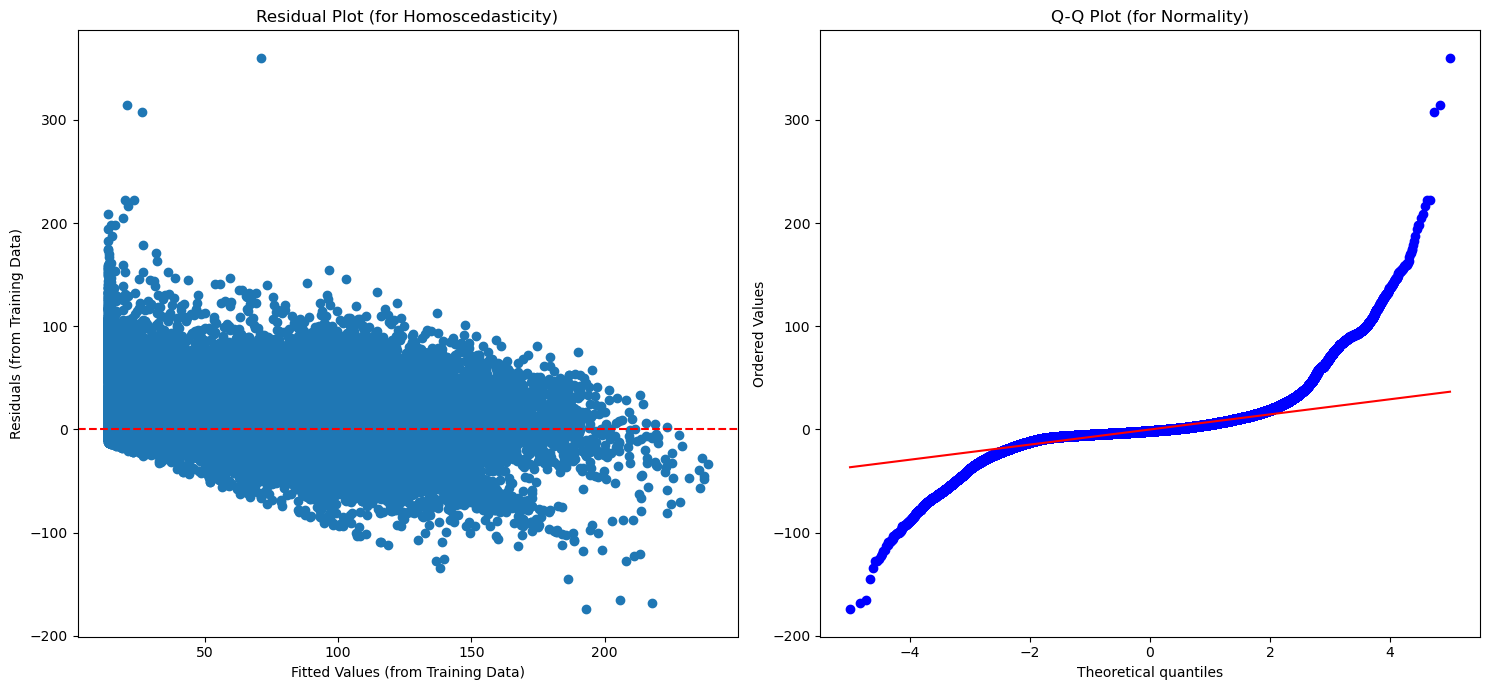

In [63]:

# Checking assumptions using the training data model 
# Residuals from the model trained on X_train, y_train
train_residuals = model.resid 

# 1. Plot for Homoscedasticity
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(model.fittedvalues, train_residuals)
plt.axhline(0, color='red', linestyle='--',)
plt.title('Residual Plot (for Homoscedasticity)')
plt.xlabel('Fitted Values (from Training Data)')
plt.ylabel('Residuals (from Training Data)')

# 2. Q-Q Plot for Normality
plt.subplot(1, 2, 2)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (for Normality)')

plt.tight_layout()
plt.show()

In [60]:
train_residuals

880942    -3.501539
1932134   -4.218574
3109774   -4.698132
3144562    7.058245
2464043    9.886074
             ...   
1854084   -3.427601
2594768    1.312134
2451543   -4.868751
3042944   -4.259238
2440785   -2.926318
Length: 2411465, dtype: float64

In [61]:
# 3. Durbin-Watson statistic is in the summary output below
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 1.391e+07
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:50:59   Log-Likelihood:            -8.5561e+06
No. Observations:             2411465   AIC:                         1.711e+07
Df Residuals:                 2411463   BIC:                         1.711e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.5347      0.007   1984.531

### Step 6 — Quick Bias–Variance Read (optional)
Compare **train** and **test** errors and describe what you see.
- MAE (Test) = 5.08 that mean on average, the predicted fare is about $5 off from the actual fare.
- RMSE (Test) = 8.34, larger errors indicate that some predictions can be around $8–$9 or more.

Based on the model's result the train error is close to the test values, so we can conclude that, the model performs similarly on both train and test data, which means it’s not overfitting. It generalizes well and execute what it learned from the training data. We are sure that the model will not give results due to bais data which it learn before. 

### Conclusion:
The model predicts taxi fares with an average error of about $5 per trip, and explains over 85% of the variation in fares using only trip distance.
This indicates a stable and trustworthy model that generalizes well to new trips — ideal for fare estimation, or pricing validation.

## We Share — Reflection & Wrap‑Up
Write **1–2 short paragraphs** addressing:


1) **Is this model good enough** for a real decision **right now**? Why/why not?
Refer to **MAE/RMSE in units**, any **assumption issues**, and whether accuracy meets a reasonable business threshold.


2) **What’s your next move** to improve trust/accuracy?
Examples: adopt a **time‑aware split**, try a more relevant **X**, transform variables, segment checks (hour/zone), or move to **Multiple Linear Regression** with validation.